In [37]:
import numpy as np       # the NumPy library for fast matrix and vector data types and math operations
import matplotlib.pyplot as plt   # functions for plotting, loaded under a convenient name alias 'plt'
import csv
import pandas as pd
from astropy import modeling
from scipy import optimize
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

In [38]:
filename="Thomson_2021-06-10_#28924.txt"

In [39]:
df = pd.read_csv(filename, delimiter = "\t", skiprows=5, warn_bad_lines=True, error_bad_lines=False) #remove lines that do not have 5 
def gaussian(x, amplitude, mean, stddev,offset):
    return amplitude * np.exp(-((x - mean)/ stddev)**2/ 2)+offset

data_columns=df.columns.values


In [40]:
num_df = (df.drop(data_columns, axis=1).join(df[data_columns].apply(pd.to_numeric, errors='coerce')))

num_df = num_df[num_df[data_columns].notnull().all(axis=1)]
num_df.index=list(range(0, len(num_df)))


In [41]:
difference = num_df.diff(axis=0)
t12=num_df[difference.iloc[:,0]<0].index.values
T1=num_df.iloc[0:t12[0]]
T2=num_df.iloc[t12[0]:t12[1]]
T3=num_df.iloc[t12[1]:len(num_df)]

C:\Users\cunha\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


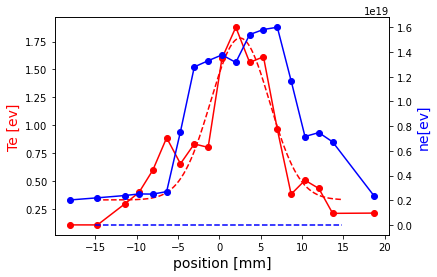

array([1.44869681, 2.52207422, 3.57286804, 0.33248626])

In [42]:
fig,ax = plt.subplots()
ax.plot(T1.iloc[:,0],T1.iloc[:,2],color="red",marker="o") 
plt.ylabel('Te [ev]', color="red",fontsize=14)
plt.xlabel('position [mm]', fontsize=14)
ax2=ax.twinx()
popt, _ = optimize.curve_fit(gaussian, T1.iloc[:,0], T1.iloc[:,2])
x=np.arange(-15,15,0.1)
ax.plot( x, gaussian(x, *popt),"--",color='red')
ax2.plot(T1.iloc[:,0],T1.iloc[:,1],color="blue",marker="o")
ax2.set_ylabel("ne[ev]",color="blue",fontsize=14)
popt2, pcov = optimize.curve_fit(gaussian, T1.iloc[:,0], T1.iloc[:,1])
x=np.arange(-15,15,0.1)
ax2.plot( x, gaussian(x, *popt2),"--",color='blue')
plt.show()
popt

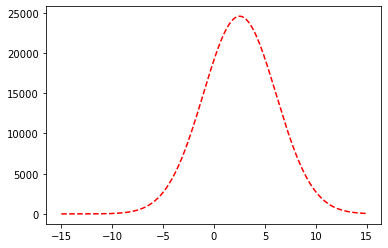

In [47]:
from scipy.integrate import quad
def integrand(x, mean, stddev,offset):
    return np.exp(-((x - mean)/ stddev)**2/ 2)+offset

mean=2.52207422
stddev=3.57286804
offset=0
I = quad(integrand, -0.015, 0.015, args=(mean,stddev,offset))
A=574.5421854489308/I[0]
A
fig,ax = plt.subplots()
ax.plot( x, gaussian(x, A,mean,stddev,offset),"--",color='red')


C:\Users\cunha\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


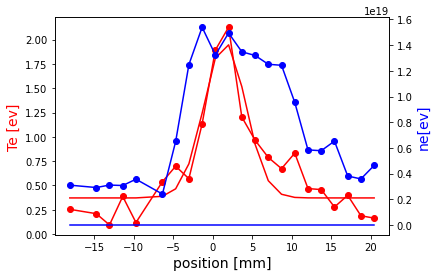

In [7]:
fig,ax = plt.subplots()
ax.plot(T2.iloc[:,0],T2.iloc[:,2],color="red",marker="o") 
plt.ylabel('Te [ev]', color="red",fontsize=14)
plt.xlabel('position [mm]', fontsize=14)
ax2=ax.twinx()
popt, _ = optimize.curve_fit(gaussian, T2.iloc[:,0], T2.iloc[:,2])
ax.plot( T2.iloc[:,0], gaussian(T2.iloc[:,0], *popt),color='red')
ax2.plot(T2.iloc[:,0],T2.iloc[:,1],color="blue",marker="o")
ax2.set_ylabel("ne[ev]",color="blue",fontsize=14)
popt2,cov = optimize.curve_fit(gaussian, T2.iloc[:,0], T2.iloc[:,1])
ax2.plot( T2.iloc[:,0], gaussian(T2.iloc[:,0], *popt2),color='blue')
plt.show()

C:\Users\cunha\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


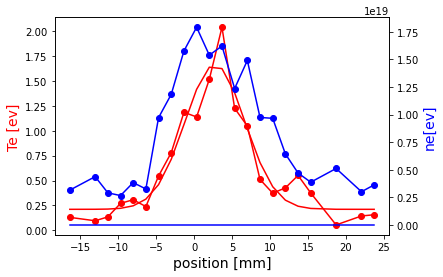

In [8]:
fig,ax = plt.subplots()
ax.plot(T3.iloc[:,0],T3.iloc[:,2],color="red",marker="o") 
plt.ylabel('Te [ev]', color="red",fontsize=14)
plt.xlabel('position [mm]', fontsize=14)
ax2=ax.twinx()
popt, _ = optimize.curve_fit(gaussian, T3.iloc[:,0], T3.iloc[:,2])
ax.plot( T3.iloc[:,0], gaussian(T3.iloc[:,0], *popt),color='red')
ax2.plot(T3.iloc[:,0],T3.iloc[:,1],color="blue",marker="o")
ax2.set_ylabel("ne[ev]",color="blue",fontsize=14)
popt2, cov = optimize.curve_fit(gaussian, T3.iloc[:,0], T3.iloc[:,1])
ax2.plot( T3.iloc[:,0], gaussian(T3.iloc[:,0], *popt2),color='blue')
plt.show()